<a href="https://colab.research.google.com/github/woodword-0/NLP_Project_SJ/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
n = 1000
dims = 2
X = []
means = []
k = 4
for i in range(k):
  X.append(np.random.randn(n,dims) + np.random.randn(1,dims)*7)
  means.append(np.mean(X[-1],axis=0))

X = np.vstack(X)
means = np.vstack(means)

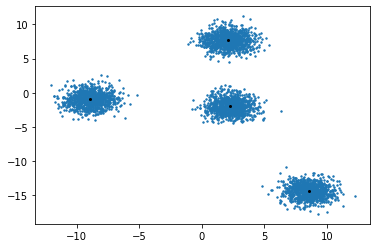

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

In [3]:
def Distance(X, means, *args,**kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = X - mean
    # dist = np.sqrt(np.sum(diff**2, axis = 1, keepdims=True))
    dist = np.sum(diff**2, axis = 1, keepdims=True)
    dists.append(dist)
  return np.hstack(dists)

In [ ]:
dist = Distance(X,means)

In [ ]:
dist.shape

(4000, 4)

In [ ]:
y_hat = np.argmin(dist, axis=1)

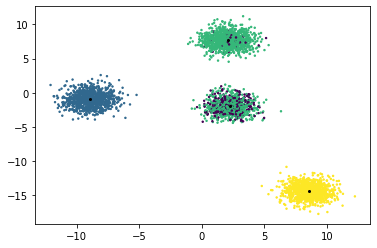

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s = 2, c = y_hat)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

In [ ]:
indices = np.arange(X.shape[0])
sample_indices = np.random.choice(indices, size = k, replace=False)
means = X[sample_indices]

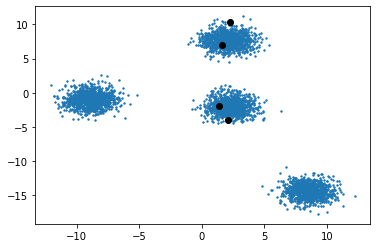

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k')

In [ ]:
dist = Distance(X, means)
y_hat = np.argmin(dist, axis = 1)

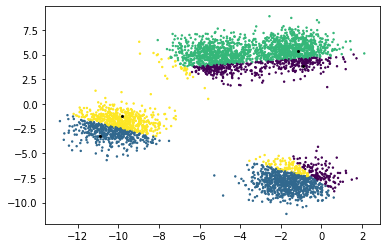

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1],c = y_hat,  s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

In [ ]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat ==i], axis = 0)
  print(mean)
  means.append(mean)
means = np.vstack(means)


[-2.26039625  1.20548272]
[-4.89713486 -6.21902848]
[-3.33093872  5.43151192]
[-8.35948471 -2.11879282]


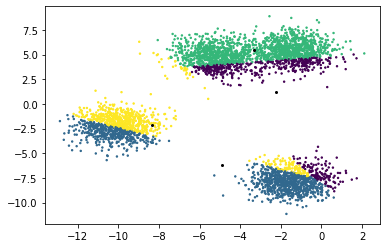

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1],c = y_hat,  s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

In [ ]:
dist = Distance(X,means)
y_hat = np.argmin(dist,axis= 1)

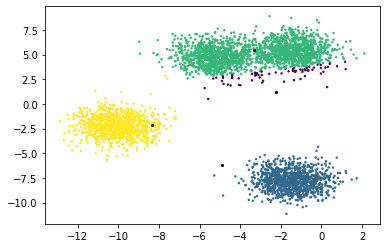

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1],c = y_hat,  s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

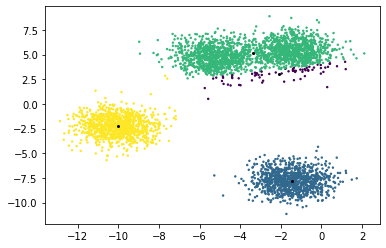

In [ ]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat ==i], axis = 0)
  means.append(mean)
means = np.vstack(means)
plt.figure()
plt.scatter(X[:,0], X[:,1],c = y_hat,  s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

In [ ]:
#Reclassify
dist = Distance(X,means)
y_hat = np.argmin(dist,axis= 1)

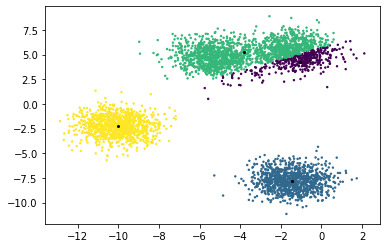

In [ ]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat ==i], axis = 0)
  means.append(mean)
means = np.vstack(means)
plt.figure()
plt.scatter(X[:,0], X[:,1],c = y_hat,  s = 2)
plt.scatter(means[:,0], means[:,1], c = 'k', s = 4)

K means Class

In [4]:
# class K_Means:
#   def __init__(self, k, distance_func = Distance, beta = None):
#     self.k = k
#     self.distance_func = distance_func
#     self.beta = beta
#   def fit(self, X, iterations = 6):
#     indices = np.arange(X.shape[0])
#     sample_indices = np.random.choice(indices, size = k, replace = False)
#     self.means = X[sample_indices]
#     for i in range(iterations):
#       y_hat = self.predict(X)
#       self.means = []
#       for j in range(self.k):
#         mean= np.mean(X[y_hat==j],axis =0)
#         self.means.append(mean)
#       self.means = np.vstack(self.means)
#     y_hat = self.predict(X)
#     plt.scatter(X[:,0],X[:,1], c = y_hat)
#     plt.scatter(means[:,0],means[:,1],c = 'k', s = 2)

#     return y_hat
  # def predict(self, X):
  #   dist = self.distance_func(X, self.means, self.beta)
  #   y_hat = np.argmin(dist, axis = 1)
  #   return y_hat
class K_Means:
  def __init__(self, k=3, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.predict(X)
      self.means=[]
      for j in range(self.k):
        mean=np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means=np.vstack(self.means)

    y_hat=self.predict(X)
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k',s=10)

    return y_hat
  
  def predict(self,X):
    dist=self.distance_func(X,self.means,self.beta)
    y_hat = np.argmin(dist,axis=1)
    return y_hat

In [5]:
my_kmeans = K_Means(5)

In [ ]:
means[:,0].shape

(4,)

array([3, 3, 3, ..., 1, 1, 1])

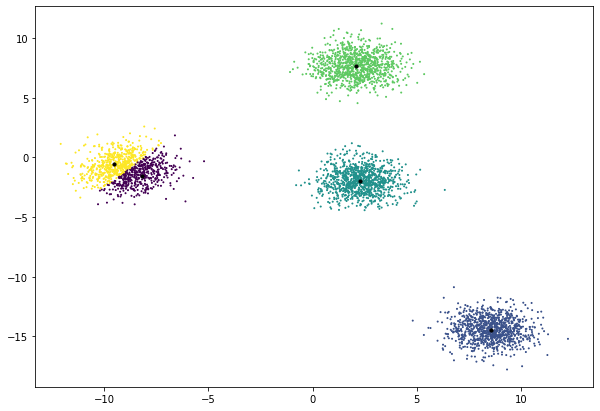

In [ ]:
my_kmeans.fit(X)

In [6]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-beta*dist)
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [ ]:
soft_means = K_Means(5,distance_func = Responsibility)

In [ ]:
soft_means.fit(X)

In [7]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

In [9]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedder = hub.load(module_url)

In [10]:
def TextPreProcess(sentence):
  text = sentence.lower()
  text_p = ''.join([char for char in text if char not in string.punctuation])
  clean_sentence = re.sub(r'http\s+','',text_p)

  return clean_sentence

In [11]:
def embed(sentence):
  sentence_in = [sentence]
  return embedder(sentence_in)

In [12]:
def data_load(filename):
  data = pd.read_csv(filename, header = 0, encoding = 'iso-8859-1')
  X = data.Tweet
  return X

In [13]:
def LoadVectors(X):
  Dict_of_Sent = dict()
  for i in range(len(X)):
    Dict_of_Sent[i] = {'Sentence':X[i], 'vector': embed(TextPreProcess(X[i]))}
  return Dict_of_Sent

In [15]:
X = data_load('/content/data_elonmusk2.csv')

In [16]:
MyNLP_Dictionary = LoadVectors(X)

In [17]:
vector_tweets=[]
for i in range(len(X)):
  vector_tweets.append(np.hstack(MyNLP_Dictionary[i]['vector'].numpy()))
vector_tweets=np.vstack(vector_tweets)

In [18]:
tweetcluster = K_Means(k = 12)

array([ 0,  2,  4, ...,  2, 10,  9])

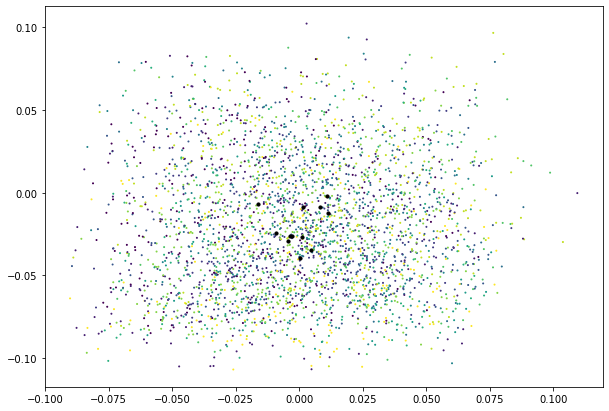

In [19]:
tweetcluster.fit(vector_tweets)

In [20]:
tweetcluster_soft = K_Means(k = 12, distance_func = Responsibility, beta = 1.6)

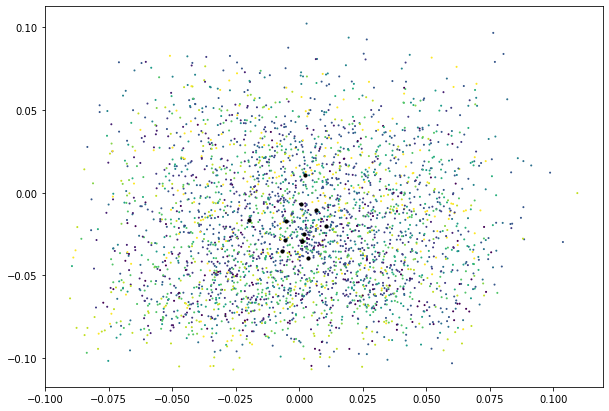

In [21]:
y_hat2 = tweetcluster_soft.fit(vector_tweets, iterations = 10)

In [22]:
y_hat2

array([ 9,  2,  3, ...,  2, 11,  8])

In [23]:
#append to dictionary group turn to data frame, whatev
for i in range(len(X)):
  print(y_hat[i]," ", MyNLP_Dictionary[i]['Sentence'])

NameError: ignored